In [11]:
import pandas as pd

# 1. 데이터읽기

In [ ]:
#판다스

1.설치해야하는 라이브러리
2.자료구조:series dataframe

In [20]:
df=pd.read_csv('./data/gapminder.tsv',sep='\t')
type(df)

pandas.core.frame.DataFrame

In [22]:
df.head() #위의 5건 출력 -default, subset

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## 1.1 데이터프레임 이해하기

In [18]:
df.shape #(row,col), 건수,항목수

(1704, 6)

In [24]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [27]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

EDA 탐색적 데이터 분석 - shape, columns,dtypes

dtype object : str

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 1.2 데이터 추출

### 1.2.1 데이터열추출

In [37]:
type(df['country'])

pandas.core.series.Series

In [39]:
df1=df['country']
df1.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [43]:
df[['country','continent']] #[속성목록]을 이용해서 데이터프레임 추출

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [49]:
#보고싶은 컬럼 4개 추출한 서브셋을 생성
df.columns


Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [53]:
df2=df[['country','lifeExp','pop','gdpPercap']]
df2.head()

,country,lifeExp,pop,gdpPercap
0,Afghanistan,28.801,8425333,779.445314
1,Afghanistan,30.332,9240934,820.853030
2,Afghanistan,31.997,10267083,853.100710
3,Afghanistan,34.020,11537966,836.197138
4,Afghanistan,36.088,13079460,739.981106


In [55]:
type(df1), type(df2) #컬럼 하나만 있는거:series, 컬럼 여러개:dataframe

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### 1.2.2 행추출

1.loc [행 이름], default rangeindex -> number

2.iloc[행번호]

In [63]:
df.loc[ 0 ]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [65]:
#100번째 행 추출
df.loc[ 99 ]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [75]:
# - index안됨
#df.loc[-1]
df.shape[0] 
df.loc[df.shape[0]-1] #row 수 (행)

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [77]:
#여러 행을 추출 - []로 지정
df.loc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [79]:
#현재 데이터프레임에서는 loc[],iloc[]가 동일
df.iloc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [3]:
# loc[], iloc[]의 차이는 컬럼을 꺼내는 방식

df.loc[[0],['country']]  #행,열을 같이 지정해서 추출 ,로 구분


NameError: name 'df' is not defined

In [83]:
df.iloc[[0],[0]]

,country
0,Afghanistan


In [85]:
# slicing : colon
df.loc[ : , ['country'] ] #전체일때는 :표시 (시작,끝 생략)

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [87]:
df.iloc[ 0:10, [0]]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


### 1.2.3 range()

In [103]:
r_list=list(range(1,5,2)) #step의 사용
df.iloc[:,r_list]

,continent,lifeExp
0,Asia,28.801
1,Asia,30.332
2,Asia,31.997
3,Asia,34.020
4,Asia,36.088
...,...,...
1699,Africa,62.351
1700,Africa,60.377
1701,Africa,46.809
1702,Africa,39.989


In [105]:
df.iloc[:, ::2]

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [117]:
#iloc로 'gdpPercap'속성의 처음 10개행 추출
df.iloc[:10,[-1]]

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


## 1.3 기초 통계 계산하기

In [124]:
#descriptive - numeric data
#전체 데이터의 요약

df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [126]:
#그룹화 > df분할 >통계
#연도별 기대수명 평균
#대륙별 국가 갯수
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [132]:
df.groupby('year')[ 'lifeExp'  ].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [140]:
#대륙별 인구 pop의 최대값
df.groupby('continent')['pop'].max().sort_index(ascending=False) #ascending=False 역순으로

continent
Oceania       20434176
Europe        82400996
Asia        1318683096
Americas     301139947
Africa       135031164
Name: pop, dtype: int64

In [144]:
#최대값 기준으로 정렬하기
df.groupby('continent')['pop'].max().sort_values(ascending=False) #ascending=False 역순으로

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [149]:
# 빈도수 게산 nunique() -중복제외
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [151]:
#value-counts() -중복포함

df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64

### 1.4 그래프로 그리기

In [156]:
year_lifeExp_mean=df.groupby('year')[ 'lifeExp'  ].mean()
year_lifeExp_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

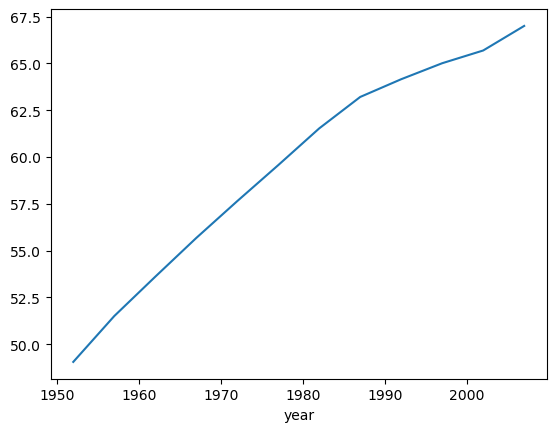

In [158]:
year_lifeExp_mean.plot()

# 2.데이터 다루기

## 2.1 시리즈 만들기

- 차원 자료: 리스트 유사, 넘파이의 어레이를 기본으로 만들어짐
- 한 열의 데이터는 모두 동일한 타입

In [13]:
import pandas as pd

In [19]:
s = pd.Series(['banana',10])
s

0    banana
1        10
dtype: object

In [21]:
s1 = pd.Series(data=['박원빈','송은석'],index=['a','b'])
s1

a    박원빈
b    송은석
dtype: object

In [23]:
s1.head()

a    박원빈
b    송은석
dtype: object

In [27]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, a to b
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [29]:
s1.loc['a']  #이름을 바꿔서 번호 못씀

'박원빈'

In [31]:
s1.iloc[0]

'박원빈'

## 2.2 데이터프레임  만들기

In [50]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [52]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [40]:
scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [64]:
#name column을 인덱스로 지정해서 데이터 프레임 생성하기
scientists.index=["Rosaline Franklin", "William Gosset"]
scientists

,Occupation,Born,Died,Age
Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,Statistician,1876-06-13,1937-10-16,61


In [66]:
f_row=scientists.loc['Rosaline Franklin']
f_row.values

array(['Chemist', '1920-07-25', '1958-04-16', 37], dtype=object)

In [68]:
f_row.index

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [72]:
f_row.keys()

Index(['Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [80]:
scientists['Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [82]:
age = scientists['Age']
age.mean() #평균,최소값,최대값,표준편차

49.0

In [86]:
age.min(), age.max(), age.std()

(37, 61, 16.97056274847714)

In [92]:
scient2 = pd.read_csv('./data/scientists.csv')

In [96]:
scient2.head(2)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician


In [98]:
ages=scient2['Age']
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [100]:
ages.describe() #기술통계량 확인, ages.mean()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [102]:
ages[ ages>ages.mean()] #벡터화, 불리언값 리스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [104]:
ages + ages #element wise - vector + vector -rank1 array

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [108]:
ages +10 #vector + scalar > broadcasting

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [110]:
s1 = pd.Series([1,100])
s1

0      1
1    100
dtype: int64

In [112]:
ages + s1  #넘파이의 브로드캐스팅과 차이, 반드시 벡터의 길이가 같아야한다.

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

## 2.3 인덱스

In [115]:
#default는 index기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [350]:
rev_ages=ages.sort_index(ascending=False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [121]:
ages*2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [123]:
ages + rev_ages #같은 인덱스를 기준으로 자동 정렬, 연산 수행

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [125]:
first_half = scient2[:4]
second_half = scient2[4:]
first_half 

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [ ]:
pd.concat([first_half,second_half] )

In [129]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [127]:
#데이터프레임에 스칼라 연산 - column의 type에  따라 연산
scient2*2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [133]:
#숫자로 구성한 데이터프레임의 더하기 연산 +, add()
df1=df2= pd.DataFrame(
    data = [[1,2,3],[4,5,6]]
)
df1.add(df2)

,0,1,2
0,2,4,6
1,8,10,12


## 2.4 열추가

In [152]:
scient2.head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [156]:
#str>datetime

born_datetime = pd.to_datetime( scient2['Born'], format='%Y-%m-%d')
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [158]:
scient2['born_dt'] = born_datetime
scient2.head(3)

,Name,Born,Died,Age,Occupation,born_dt
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12


In [160]:
died_datetime = pd.to_datetime( scient2['Died'], format='%Y-%m-%d')
died_datetime

0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]

In [162]:
scient2['died_dt'] = died_datetime

In [178]:
scient2['age_days'] = scient2['died_dt'] - scient2['born_dt']
scient2['age_days'].dtype

dtype('<m8[ns]')

In [174]:
#series.apply(함수)
import numpy as np
scient2['age_days'] =(scient2['age_days'].dt.days/365).apply(np.floor) #floor 버림 함수
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age-days,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,77.0


In [195]:
#df.assign(변수 = 수식), col_name은 새로 만들어짐.

scinet2=scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'] , 
    age_assign = ((scient2['died_dt'] - scient2['born_dt']).dt.days/365).apply(np.floor)
)
scient2


,Name,Born,Died,Age,Occupation,born_dt,died_dt,age-days,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days


## 2.5 열 삭제

In [197]:
scient3_d = scient2.drop(['Age'], axis='columns') #or axis=1 컬럼임
                                                #drop한 새로운 데이터프레임 만듦
scient3_d #삭제된 데이터프레임

,Name,Born,Died,Occupation,born_dt,died_dt,age-days,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,13779 days,13779 days
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,22404 days,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,32964 days,32964 days
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,24345 days,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,20777 days,20777 days
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,16529 days,16529 days
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days


In [199]:
scient2 #그대로

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age-days,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days


In [ ]:
scient2.drop(['Age'], axis='columns', inplace=True) #원본대체

## 2.6 파일 저장
- 피클로 저장(객체화, Serialize)
- 파이썬의 데이터파일 형식 : 바이너리 저장/읽기, pickle/.pk1/.p
- 시리즈, 데이터프레임 저장
- csv, tsv, excel 지원
- to_csv(),read_csv()
- excel의 경우는 openpyx1을 설치해야한다.
- pip install openpyx1

In [204]:
scient2['Name']

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [ ]:
fp = open()
load(fp)
dump(fp)

In [225]:
scient2['Name'].to_pickle('./data/scientist_names_series.pickle') #저장경로/파일이름

In [227]:
#파클 파일에서 읽어오기

series_pk1 = pd.read_pickle('./data/scientist_names_series.pickle')
series_pk1

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [231]:
#데이터프레임을 저장, 다시 읽어오기
scient2.to_pickle('./data/scientist_df.pickle')

In [235]:
pd.read_pickle('./data/scientist_df.pickle')

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age-days,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days


In [237]:
scient2.to_csv('./data/scientist_df.csv')

In [239]:
scient2_csv_df = pd.read_csv('./data/scientist_df.csv')
type(scient2_csv_df)

pandas.core.frame.DataFrame

In [241]:
scient2.head(2)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age-days,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days


In [243]:
#사전형식과 데이터프레임
sci_dict = scient2.to_dict()
sci_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Age': {0: 37, 1: 61, 2: 90, 3: 66, 4: 56, 5: 45, 6: 41, 7: 77},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'born_dt': {0: Timestamp('1920-07-25 00:00:00'),
  1: Timestamp('1876-06-13 00:00:00'),
  2: Timestamp('1820-05-12 00:00:00'),
  3: Timestamp('1867-11-07 00:00:00'),
  4: Timestamp('1907-05-27 00:00:00'),
  5: Timestamp('1813-03-15 00:00:00'),
  6: Timesta

In [247]:
sci_dict_df = pd.DataFrame.from_dict(sci_dict)
sci_dict_df

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age-days,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,13779 days,13779 days
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,22404 days,22404 days
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,32964 days,32964 days
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,24345 days,24345 days
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,20777 days,20777 days
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,16529 days,16529 days
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,15324 days,15324 days
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,28422 days,28422 days


In [271]:
#df > json
sci_json = scient2.to_json(orient='records',indent=2, date_format='iso')
           
sci_json


'[\n  {\n    "Name":"Rosaline Franklin",\n    "Born":"1920-07-25",\n    "Died":"1958-04-16",\n    "Age":37,\n    "Occupation":"Chemist",\n    "born_dt":"1920-07-25T00:00:00.000",\n    "died_dt":"1958-04-16T00:00:00.000",\n    "age-days":"P13779DT0H0M0S",\n    "age_days":"P13779DT0H0M0S"\n  },\n  {\n    "Name":"William Gosset",\n    "Born":"1876-06-13",\n    "Died":"1937-10-16",\n    "Age":61,\n    "Occupation":"Statistician",\n    "born_dt":"1876-06-13T00:00:00.000",\n    "died_dt":"1937-10-16T00:00:00.000",\n    "age-days":"P22404DT0H0M0S",\n    "age_days":"P22404DT0H0M0S"\n  },\n  {\n    "Name":"Florence Nightingale",\n    "Born":"1820-05-12",\n    "Died":"1910-08-13",\n    "Age":90,\n    "Occupation":"Nurse",\n    "born_dt":"1820-05-12T00:00:00.000",\n    "died_dt":"1910-08-13T00:00:00.000",\n    "age-days":"P32964DT0H0M0S",\n    "age_days":"P32964DT0H0M0S"\n  },\n  {\n    "Name":"Marie Curie",\n    "Born":"1867-11-07",\n    "Died":"1934-07-04",\n    "Age":66,\n    "Occupation":"Che

In [273]:
#raw형식의 데이터 출력 형식을 지정할 수 있다.
import pprint
pprint.pprint(sci_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Age":37,\n'
 '    "Occupation":"Chemist",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "died_dt":"1958-04-16T00:00:00.000",\n'
 '    "age-days":"P13779DT0H0M0S",\n'
 '    "age_days":"P13779DT0H0M0S"\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Age":61,\n'
 '    "Occupation":"Statistician",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "died_dt":"1937-10-16T00:00:00.000",\n'
 '    "age-days":"P22404DT0H0M0S",\n'
 '    "age_days":"P22404DT0H0M0S"\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Age":90,\n'
 '    "Occupation":"Nurse",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "died_dt":"1910-08-13T00:00:00.000",\n'
 '    "age-days":"P32964DT0H0M0S",\n'
 '    "age_days":"P32964DT0H0M0S

In [275]:
#json > df생성
df_json = pd.read_json(sci_json)

C:\Users\엄지영\AppData\Local\Temp\ipykernel_32996\2070104957.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_json = pd.read_json(sci_json)


In [288]:
df_json.to_pickle('./data/sci_json.pickle')

# 3.데이터전처리

## 3-1.깔끔한 데이터
 1. 열이름:변수가 아니라 변수의 값이 온 경우 1개가 아니라 여러개

In [298]:
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [312]:
#분산되어 있는 컬럼을 하나로 합칩니다. >wide data
#하나의 컬럼으로 합치기 > 언피봇 '피봇되돌리기' > melt()
pew_long = pew.melt(id_vars='religion', var_name='income', value_name='count')
pew_long

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['religion']"

In [310]:
bill=pd.read_csv('./data/billboard.csv')
bill

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bill_long = bill.melt(id_vars=['religion'], var_name='wk', value_name='count')

In [314]:
#열이름에 var,data가 포함되어 있다.
evola=pd.read_csv('./data/country_timeseries.csv')
evola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [316]:
evola_long = evola.melt(id_vars=['Date','Day'])
evola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [320]:
var_split = evola_long.variable.str.split('_')
var_split

0       [Cases, Guinea]
1       [Cases, Guinea]
2       [Cases, Guinea]
3       [Cases, Guinea]
4       [Cases, Guinea]
             ...       
1947     [Deaths, Mali]
1948     [Deaths, Mali]
1949     [Deaths, Mali]
1950     [Deaths, Mali]
1951     [Deaths, Mali]
Name: variable, Length: 1952, dtype: object

In [326]:
status_values = var_split.str.get(0)
country_values = var_split.str.get(1)
type(status_values )

pandas.core.series.Series

In [330]:
evola_long['status']=status_values
evola_long['country']=country_values

In [334]:
evola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [338]:
evola_long1 = evola.melt(id_vars=['Date','Day'])

In [346]:
var_split_1=evola_long1.variable.str.split('_',expand=True)
var_split_1

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [348]:
evola_long1[['status','country']]=var_split_1
evola_long1

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali
